In [2]:
import pandas as pd
import gzip
import numpy as np

filePath_train_set = 'FashionMNIST-dataset/train-images-idx3-ubyte.gz'
filePath_train_label = 'FashionMNIST-dataset/train-labels-idx1-ubyte.gz'

filePath_test_set = 'FashionMNIST-dataset/t10k-images-idx3-ubyte.gz'
filePath_test_label = 'FashionMNIST-dataset/t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

print(type(testLabel))

print(trainSet.shape)

print(trainLabel.shape)

print(testSet.shape)

print(testLabel.shape)

<class 'numpy.ndarray'>
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [3]:
X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [4]:
# matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

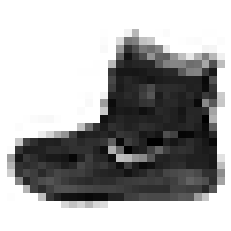

In [5]:
def showImage(data):
    some_article = data
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()
    
showImage(X_train[0])

In [6]:
y_train[0]

9

In [7]:
import numpy as np
np.random.seed(42)   # if you want reproducible results set the random seed value.
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

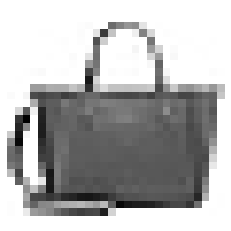

In [8]:
showImage(X_train[0])

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [10]:
# Let us import some libraries that we will use quite often
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [11]:
from sklearn.linear_model import SGDClassifier
# Let us train the model
sgd_clf = SGDClassifier(random_state=42) 
sgd_clf.fit(X_train_scaled, y_train)

c:\Users\gopl0\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(random_state=42)

In [12]:
# Let us predict some instance from the dataset using the above trained model
y_train_predict = sgd_clf.predict(X_train[0].reshape(1, -1))

In [13]:
y_train[0]

8

In [14]:

y_train_predict[0]

8

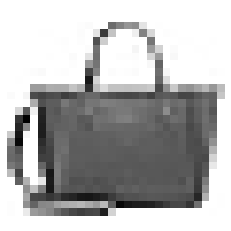

In [15]:
showImage(X_train[0])

In [16]:
# Let us predict all instances of training dataset X_train_scaled using the above trained model
y_train_predict = sgd_clf.predict(X_train_scaled)

In [17]:
sgd_accuracy = accuracy_score(y_train, y_train_predict)
sgd_precision = precision_score(y_train, y_train_predict, average='weighted')
sgd_recall = recall_score(y_train, y_train_predict, average='weighted')
sgd_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("SGD Accuracy: ", sgd_accuracy)
print("SGD Precision: ", sgd_precision)
print("SGD Recall: ", sgd_precision)
print("SGD F1 Score: ", sgd_f1_score)

SGD Accuracy:  0.8489
SGD Precision:  0.8493628950770987
SGD Recall:  0.8493628950770987
SGD F1 Score:  0.8487538349065629


Data Augmentation

In [18]:

from scipy.ndimage.interpolation import shift

In [19]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.852 total time=  14.1s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.859 total time=  13.9s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.853 total time=  12.9s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.851 total time=  12.9s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.850 total time=  13.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.853 total time=  12.7s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.860 total time=  12.8s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.854 total time=  12.8s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.852 total time=  12.8s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.853 total time=  12.8s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.855 total time=  15.2s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

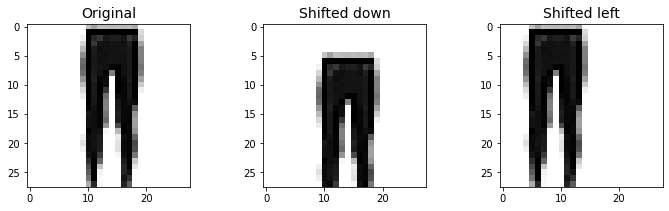

In [20]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [21]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [22]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [26]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

In [27]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [28]:
grid_search.best_score_

0.8573166666666667

In [29]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)

0.8597

In [30]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [31]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8594